In [1]:
import pandas as pd
import numpy as np

import seaborn as sns 

In [2]:
train_df = pd.read_csv('training.csv')

In [3]:
train_df.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
train_df.columns

Index(['High(t-4)', 'Low(t-4)', 'Close_x(t-4)', 'Close_y(t-4)',
       'reddit_sentiment(t-4)', 'twitter_sentiment(t-4)', 'High(t-3)',
       'Low(t-3)', 'Close_x(t-3)', 'Close_y(t-3)', 'reddit_sentiment(t-3)',
       'twitter_sentiment(t-3)', 'High(t-2)', 'Low(t-2)', 'Close_x(t-2)',
       'Close_y(t-2)', 'reddit_sentiment(t-2)', 'twitter_sentiment(t-2)',
       'High(t-1)', 'Low(t-1)', 'Close_x(t-1)', 'Close_y(t-1)',
       'reddit_sentiment(t-1)', 'twitter_sentiment(t-1)', 'High(t)', 'Low(t)',
       'Close_x(t)', 'Close_y(t)', 'reddit_sentiment(t)',
       'twitter_sentiment(t)', 'roe', 'debtToEquity', 'ev/ebitda', 'eps',
       'Close_x1(t+1)'],
      dtype='object')

In [5]:
col_order = ['High(t-4)', 'High(t-3)', 'High(t-2)', 'High(t-1)', 'High(t)', 'Low(t-4)', 'Low(t-3)','Low(t-2)',
            'Low(t-1)', 'Low(t)', 'Close_x(t-4)', 'Close_x(t-3)', 'Close_x(t-2)', 'Close_x(t-1)', 'Close_x(t)',
            'Close_y(t-4)', 'Close_y(t-3)', 'Close_y(t-2)', 'Close_y(t-1)', 'Close_y(t)', 'reddit_sentiment(t-4)',
            'reddit_sentiment(t-3)', 'reddit_sentiment(t-2)', 'reddit_sentiment(t-1)', 'reddit_sentiment(t)',
            'twitter_sentiment(t-4)', 'twitter_sentiment(t-3)', 'twitter_sentiment(t-2)', 'twitter_sentiment(t-1)',
            'twitter_sentiment(t)', 'roe', 'debtToEquity', 'ev/ebitda', 'eps', 'Close_x1(t+1)']

In [6]:
train_df = train_df[col_order]

In [7]:
train_scaled = train_df.copy()

In [8]:
train_scaled.iloc[0][20:]

reddit_sentiment(t-4)      0.000000
reddit_sentiment(t-3)      0.000000
reddit_sentiment(t-2)      0.000000
reddit_sentiment(t-1)      0.000000
reddit_sentiment(t)        0.000000
twitter_sentiment(t-4)     0.137917
twitter_sentiment(t-3)     0.262374
twitter_sentiment(t-2)     0.291613
twitter_sentiment(t-1)     0.280743
twitter_sentiment(t)       0.345201
roe                        0.109210
debtToEquity               2.230663
ev/ebitda                  4.457843
eps                        1.050000
Close_x1(t+1)             43.286526
Name: 0, dtype: float64

In [9]:
trform_list = {}

In [10]:
def minmaxscaler(index, row, in_size, num_var):
    trform_dict = {}
    trformed_row = []
    value = 0
    for i in range(num_var):
        cur = np.array(row[ i*in_size : (i+1)*in_size ])
        rowmaxmin = cur.max() - cur.min()
        print('rowmaxmin', rowmaxmin)
        rowmin = cur.min()
        print('rowmin', rowmin)
        trform_dict[i] = [rowmaxmin, rowmin]
        trform_list[index] = trform_dict
        cur = [ (x - rowmin) / (rowmaxmin) for x in cur]
        trformed_row.extend(cur)
        if (i == 2):
            target = row[-1]
            value = (target - rowmin) / rowmaxmin
    
    rest = np.array(row[ num_var*in_size : -1 ])
    trformed_row.extend(rest)
    trformed_row.append(value)
    return trformed_row
            
        
        
            

In [11]:
for index, row in train_scaled.iterrows():
    trformed_row = minmaxscaler(index, row, 5, 4)
    train_scaled.loc[index] = trformed_row

rowmaxmin 1.6508996621856014
rowmin 41.35737509596889
rowmaxmin 4.664516461837827
rowmin 37.12912131720494
rowmaxmin 1.728454589843757
rowmin 40.820098876953125
rowmaxmin 86.31005859375
rowmin 2709.800048828125
rowmaxmin 1.6066030083946998
rowmin 41.73315406965472
rowmaxmin 1.2168728890840015
rowmin 40.57676488995877
rowmaxmin 2.4664268493652344
rowmin 40.820098876953125
rowmaxmin 86.31005859375
rowmin 2709.800048828125
rowmaxmin 3.8495757483225646
rowmin 41.73315406965472
rowmaxmin 2.4171728787086195
rowmin 40.98308218455416
rowmaxmin 4.2584877014160085
rowmin 41.23471832275391
rowmaxmin 57.33984375
rowmin 2775.60009765625
rowmaxmin 5.279552263537468
rowmin 42.55339511545279
rowmaxmin 3.6874556125854525
rowmin 41.0096967766733
rowmaxmin 3.5108299255371094
rowmin 42.15658187866211
rowmaxmin 49.639892578125
rowmin 2783.300048828125
rowmaxmin 4.824672620835763
rowmin 43.00827475815449
rowmaxmin 3.685043049241912
rowmin 41.01210934001684
rowmaxmin 3.7237510681152273
rowmin 42.548553466796

rowmaxmin 15.394485473632798
rowmin 107.13109588623048
rowmaxmin 240.260009765625
rowmin 3310.239990234375
rowmaxmin 7.987796877871162
rowmin 115.5128728742382
rowmaxmin 8.214335078178266
rowmin 105.70294688474958
rowmaxmin 11.56069946289061
rowmin 107.13109588623048
rowmaxmin 316.669921875
rowmin 3310.239990234375
rowmaxmin 4.63902109286316
rowmin 115.5128728742382
rowmaxmin 6.901325214647542
rowmin 105.70294688474958
rowmaxmin 11.56069946289061
rowmin 107.13109588623048
rowmaxmin 316.669921875
rowmin 3310.239990234375
rowmaxmin 4.63902109286316
rowmin 115.5128728742382
rowmaxmin 6.901325214647542
rowmin 105.70294688474958
rowmaxmin 11.56069946289061
rowmin 107.13109588623048
rowmaxmin 316.669921875
rowmin 3310.239990234375
rowmaxmin 3.847864178297513
rowmin 119.0568461202552
rowmaxmin 11.313975606796191
rowmin 107.09169655838517
rowmaxmin 9.767654418945312
rowmin 112.32801818847656
rowmaxmin 141.4599609375
rowmin 3550.5
rowmaxmin 5.209406456761059
rowmin 119.0568461202552
rowmaxmin 7

rowmaxmin 21.96021052800768
rowmin 150.8787382124014
rowmaxmin 21.259350364835626
rowmin 141.4718249116798
rowmaxmin 26.240325927734375
rowmin 146.39926147460938
rowmaxmin 466.2900390625
rowmin 3830.85009765625
rowmaxmin 20.02293863160611
rowmin 155.56724058335223
rowmaxmin 20.368839059504268
rowmin 146.23997992270364
rowmaxmin 20.387161254882812
rowmin 152.25242614746094
rowmaxmin 330.300048828125
rowmin 3966.840087890625
rowmaxmin 12.706476819318397
rowmin 162.88370239563994
rowmaxmin 16.49660187425519
rowmin 150.11221710795272
rowmaxmin 11.866226196289062
rowmin 160.7733612060547
rowmaxmin 266.530029296875
rowmin 4030.610107421875
rowmaxmin 13.546811987712857
rowmin 162.04336722724548
rowmaxmin 12.430376015057277
rowmin 154.17844296715063
rowmaxmin 17.32476806640625
rowmin 155.3148193359375
rowmaxmin 372.880126953125
rowmin 3924.260009765625
rowmaxmin 13.546811987712857
rowmin 162.04336722724548
rowmaxmin 14.414055845633328
rowmin 152.19476313657458
rowmaxmin 17.32476806640625
rowmi

In [12]:
trform_list

{0: {0: [1.6508996621856014, 41.35737509596889],
  1: [4.664516461837827, 37.12912131720494],
  2: [1.728454589843757, 40.820098876953125],
  3: [86.31005859375, 2709.800048828125]},
 1: {0: [1.6066030083946998, 41.73315406965472],
  1: [1.2168728890840015, 40.57676488995877],
  2: [2.4664268493652344, 40.820098876953125],
  3: [86.31005859375, 2709.800048828125]},
 2: {0: [3.8495757483225646, 41.73315406965472],
  1: [2.4171728787086195, 40.98308218455416],
  2: [4.2584877014160085, 41.23471832275391],
  3: [57.33984375, 2775.60009765625]},
 3: {0: [5.279552263537468, 42.55339511545279],
  1: [3.6874556125854525, 41.0096967766733],
  2: [3.5108299255371094, 42.15658187866211],
  3: [49.639892578125, 2783.300048828125]},
 4: {0: [4.824672620835763, 43.00827475815449],
  1: [3.685043049241912, 41.01210934001684],
  2: [3.7237510681152273, 42.54855346679688],
  3: [83.889892578125, 2783.300048828125]},
 5: {0: [5.10776415869946, 43.339757078049416],
  1: [5.214226761622228, 41.0121093400

In [13]:
train_scaled

,High(t-4),High(t-3),High(t-2),High(t-1),High(t),Low(t-4),Low(t-3),Low(t-2),Low(t-1),Low(t),...,twitter_sentiment(t-4),twitter_sentiment(t-3),twitter_sentiment(t-2),twitter_sentiment(t-1),twitter_sentiment(t),roe,debtToEquity,ev/ebitda,eps,Close_x1(t+1)
0,0.000000,0.570606,0.227621,0.724466,1.000000,0.000000,0.739121,0.826229,0.831935,1.000000,...,0.137917,0.262374,0.291613,0.280743,0.345201,0.109210,2.230663,4.457843,1.050,1.426955
1,0.352442,0.000000,0.510544,0.793675,1.000000,0.000000,0.333903,0.355774,1.000000,0.357757,...,0.262374,0.291613,0.280743,0.345201,0.213995,0.109210,2.230663,4.457843,1.050,1.894687
2,0.000000,0.213073,0.331237,0.417345,1.000000,0.000000,0.011011,0.335332,0.012009,1.000000,...,0.291613,0.280743,0.345201,0.213995,0.283504,0.109210,2.230663,4.457843,1.050,1.040908
3,0.000000,0.086159,0.148945,0.573786,1.000000,0.000000,0.212597,0.000654,0.648295,1.000000,...,0.280743,0.345201,0.213995,0.283504,0.259652,0.109210,2.230663,4.457843,1.050,1.172293
4,0.000000,0.068706,0.533602,1.000000,0.758775,0.212081,0.000000,0.648065,1.000000,0.990150,...,0.345201,0.213995,0.283504,0.259652,0.213035,0.109210,2.230663,4.457843,1.050,1.575700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1.000000,0.705911,0.000000,0.475632,0.222729,0.811659,0.000000,0.036068,1.000000,0.769025,...,0.226419,0.140308,0.239292,0.125853,0.086957,0.504836,5.282353,3.744930,1.272,0.551543
196,1.000000,0.000000,0.673784,0.315520,0.130279,0.000000,0.036068,1.000000,0.769025,0.516367,...,0.140308,0.239292,0.125853,0.086957,0.064787,0.528813,5.112557,2.692085,1.290,0.604801
197,0.473767,1.000000,0.720192,0.575517,0.000000,0.000000,1.000000,0.760382,0.498271,0.467994,...,0.239292,0.125853,0.086957,0.064787,0.141762,0.528813,5.112557,2.692085,1.290,-2.918726
198,1.000000,0.720192,0.575517,0.000000,0.424484,1.000000,0.813217,0.608901,0.585300,0.000000,...,0.125853,0.086957,0.064787,0.141762,0.124669,0.528813,5.112557,2.692085,1.290,-0.032608


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_scaled.drop('Close_x1(t+1)',axis=1), train_scaled['Close_x1(t+1)'] ,
                                   random_state=88, 
                                   test_size=0.25, 
                                   shuffle=False)

In [40]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train, random_state=0)

In [42]:
y_train

114   -0.045749
62     1.019220
33     1.391923
107    0.440071
7      1.005068
         ...   
9     -1.460544
103    0.107142
67     1.566539
117    0.167418
47     0.629913
Name: Close_x1(t+1), Length: 150, dtype: float64

In [43]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle


# Define parameter grid for GridSearchCV
param_grid = {
    'max_depth': [1,3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [50, 100, 200],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

# Define XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror')

# Perform grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Print results
print(f'Best parameters: {grid_search.best_params_}')
print(f'Best score: {grid_search.best_score_}')

# Use best model to make predictions
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, predictions)
print(f'Mean squared error: {mse}')

Best parameters: {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 1, 'min_child_weight': 5, 'n_estimators': 200, 'subsample': 1.0}
Best score: -0.38489570799101414
Mean squared error: 0.5024780340945444


In [23]:
cv_results = grid_search.cv_results_
for mean_score, std_score, params in zip(cv_results['mean_test_score'], cv_results['std_test_score'], cv_results['params']):
    print(f'Mean score: {mean_score:.3f}, Standard deviation: {std_score:.3f}, Parameters: {params}')

Mean score: -0.400, Standard deviation: 0.069, Parameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 1, 'min_child_weight': 1, 'n_estimators': 50, 'subsample': 0.8}
Mean score: -0.380, Standard deviation: 0.047, Parameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 1, 'min_child_weight': 1, 'n_estimators': 50, 'subsample': 1.0}
Mean score: -0.431, Standard deviation: 0.050, Parameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 1, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.8}
Mean score: -0.404, Standard deviation: 0.030, Parameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 1, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 1.0}
Mean score: -0.460, Standard deviation: 0.016, Parameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 1, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.8}
Mean score: -0.43

In [44]:
pred_trformed = [ predictions[x-150] * trform_list[x][2][0] + trform_list[x][2][1] for x in y_test.index ]

In [45]:
y_trformed =  [ y_test[x] * trform_list[x][2][0] + trform_list[x][2][1] for x in y_test.index ]

In [46]:
mean_squared_error(y_trformed, pred_trformed)

67.87716761562183

In [48]:
validation_pred = best_model.predict(train_scaled.drop('Close_x1(t+1)',axis=1))

In [49]:
validation_y = train_scaled['Close_x1(t+1)']

In [51]:
v_pred_trformed = [ validation_pred[x] * trform_list[x][2][0] + trform_list[x][2][1] for x in validation_y.index ]

In [52]:
v_y_trformed = [ validation_y[x] * trform_list[x][2][0] + trform_list[x][2][1] for x in validation_y.index ]

<AxesSubplot:>

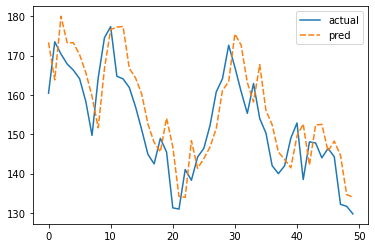

In [47]:
output = pd.DataFrame({'actual': y_trformed, 'pred': pred_trformed })
sns.lineplot(data=output)

<AxesSubplot:>

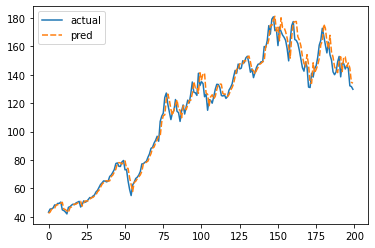

In [53]:
output = pd.DataFrame({'actual': v_y_trformed, 'pred': v_pred_trformed })
sns.lineplot(data=output)